In [ ]:
#Taller 1--Alejandra Ocampo/Valentina Malagon 
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sbn
from matplotlib import pyplot as plt
from numpy.ma.core import sqrt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Para este taller vamos a analizar los precios mensuales para el periodo Enero 2010 a Diciembre 2021 de las siguientes acciones:

*   **MCD**: Correspondiente a la empresa McDonald`s.
*   **GE**: Correspondiente a General Electric Company.
*  **IBM**:Corresponidnete a International Business Machines Corporation.
*   **T**: Correspondiente a AT&T.

Hay que tener en cuenta que para estos analisis se usaran los precios ajustados, ya que este puede considerarse como el "precio real" de la accion por lo que se han aplicado los ajustes debidos despues del cierre de esta,ademas de los diferentes factores corporativos como los dividendos, distribuciones, etc.

In [ ]:
#Creamos un vector de activos y traemos de yahoo finance los precios mensuales ajustados 
activos = ["MCD", "GE","IBM","T"]
precios = yf.download(activos,start="2010-01-01",end="2021-12-31",interval="1Mo").dropna()
precios_adj = precios.loc[:,"Adj Close"]
precios_adj

[*********************100%***********************]  4 of 4 completed


,GE,IBM,MCD,T
Date,,,,
2010-01-01,91.124496,76.034454,43.710964,7.295420
2010-02-01,91.011169,78.997833,44.705189,7.279534
2010-03-01,103.782227,80.031342,47.111687,7.581751
2010-04-01,107.545769,80.499352,49.844334,7.646299
2010-05-01,93.232956,78.165520,47.217602,7.283846
...,...,...,...,...
2021-08-01,105.016113,126.196457,232.276596,19.121511
2021-09-01,102.645004,126.366844,237.139893,18.835596
2021-10-01,104.559380,113.787468,241.506790,17.615221


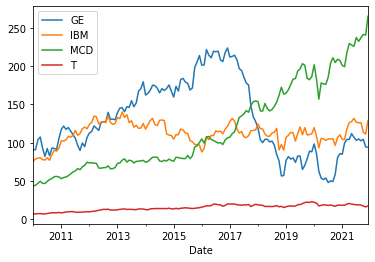

In [ ]:
precios_adj.plot()

In [ ]:
#Retornos
retornos = precios_adj.pct_change().dropna()
retornos

,GE,IBM,MCD,T
Date,,,,
2010-02-01,-0.001243,0.038974,0.022745,-0.002177
2010-03-01,0.140324,0.013083,0.053831,0.041515
2010-04-01,0.036264,0.005847,0.058003,0.008514
2010-05-01,-0.133086,-0.028992,-0.052699,-0.047403
2010-06-01,-0.118043,-0.009157,-0.006678,-0.004527
...,...,...,...,...
2021-08-01,0.017471,-0.004398,-0.021631,0.001371
2021-09-01,-0.022579,0.001350,0.020938,-0.014953
2021-10-01,0.018650,-0.099547,0.018415,-0.064791


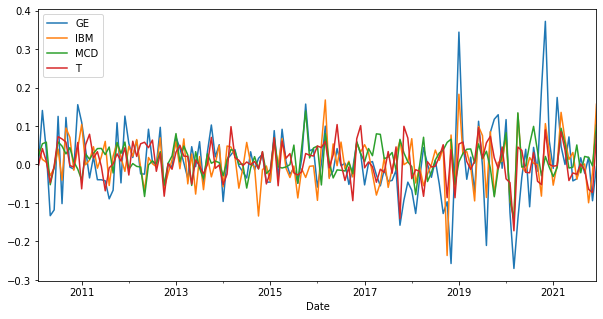

In [ ]:
retornos.plot(figsize=(10,5))

In [ ]:
#Retornos logaritmicos 
ret=np.log(precios_adj/precios_adj.shift()).dropna()
ret

,GE,IBM,MCD,T
Date,,,,
2010-02-01,-0.001244,0.038234,0.022491,-0.002180
2010-03-01,0.131312,0.012998,0.052432,0.040677
2010-04-01,0.035622,0.005831,0.056384,0.008478
2010-05-01,-0.142815,-0.029421,-0.054138,-0.048563
2010-06-01,-0.125612,-0.009200,-0.006700,-0.004538
...,...,...,...,...
2021-08-01,0.017320,-0.004408,-0.021868,0.001370
2021-09-01,-0.022837,0.001349,0.020721,-0.015065
2021-10-01,0.018479,-0.104857,0.018247,-0.066985


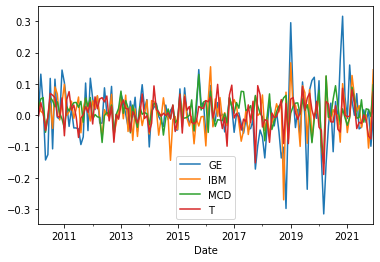

In [ ]:
ret.plot()

Antes de realizar el analisis de los resultados hay que tener en cuenta la diferencia entre **Retornos** y los **Retornos Logaritmicos**. Los retornos son la variacion porcentual que tiene un activo en un determinado periodo de tiempo, es decir si estamos mirando la accion MCD entre ayer y hoy, es la variacion que hay dentro de estos dos dias, el cual nos dara un valor porcentual el cual puede ser tanto negativo como positivo y nos indica lo que ha ganado o perdido el inversionista. Por otro  lado, los retornos logaritmicos, a diferencia de los anteriores estos se pueden sumar en el tiempo.

**Analisis:** Los analisis se realizaran a partir de los retornos logaritmicos de los precios ajustados.


*   **GE:** La variacion mensual del precio de esta accion se encuentra entre -10% y 10% aproximadamente durante el periodo de 2010 y 2018 .En el 2018 se evidencia una variacion porcentual casi del 30% tanto positivo como negativo, esto debido a dos importantes factores: El primero se da apartir de un rumor sobre la falsificacion de sus Estados Financieros lo que hizo que los inversionistas vendieran sus acciones debido a la perdida de credibilidad de la empresa, nunca se confirmo este rumor por lo que la empresa se recupero de esta caida y como se ve en la variacion porcentual la gente lo tomo como un momento de invertir lo que genero gran demanda de esta accion llevandola a un alza. Otro factor importante fueron las millonarias perdidas que registro la empresa en 2018, pues duplicaron las del año 2017 y genero una incertidumbre en los accionistas. Este es un claro ejemplo de como los retornos nos ayudan a evidenciar momentos criticos tanto negativos como positivos de la empresa, que ayudan para la toma de desiciones financieras.

*   **IBM:** La accion de IBM es muy parecida a la de GE, ya que su variacion mensual se encuentra entre el -10% y 10%. El problema que tenemos con esta empresa se da atraves de que al pertenecer al sector de la tecnologia, la competencia dentro de este es muy grande con empresas como Amazon, Microsoft, Alibaba, entre otros, lo que hace que los inversionistas de este sector prefieran otras antes que ella. Al analizar desde el 2010, podemos ver que dentro de este periodo hasta las 2013 debido a la transformacion que tuvo el negocio hacia los servicios de IT, pero despues de este comenzo a caer debido a la competencia. En 2020, debido a la pandemia la accion tuvo una variacion porcentual muy grande marcando una caida casi del 30%, pero gracias a la reactivacion economica vemos como ha ido recuperandose, pero sus retornos no terminan de convencer a los accionistas para entrar en estas posiciones.

*  **MCD:** En primer lugar hay que tener en cuenta que el negocio de McDonalds no es solamente ser una cadena de restaurantes, si no que tambien tiene un negocio inmobiliario que le genera grandes ingresos y valor como compañia. La tendencia de esta empresa va en alza por lo que las variaciones casi siempre estan positivas. Para McDonald's la crisis mundial del covid-19, le afecto mucho, pues la gran mayoria de sus locales estuvieron cerrados debido al confinamiento mundial, pero aunque en este año toco minimos historicos tambien toco maximos, que al dia siguen mostrando retornos positivos.

*  **T:** Los retornos de la empresa de AT&T no tiene muchas variaciones, esto debido a que podria llamarse una compañia estancada, pues su accion no sube ni baja mucho. Como la gran mayoria de las comapñias del mundo, en 2020 se ve una gran variacion negativa a causa del covid-19 y no ha logrado recuperarse, otra variacion significativa en caida es por una noticia sobre la separacion de la comapñia con Warner Media. Por lo que apartir de  los retornos de esta accion, podemos tomar una desicion financiera sobre si comprar o vender, pero el hecho de que no tengan retornos tan significativos puede complicar esto.




In [ ]:
#Estadisticas Descriptivas
stats= {"Media":ret.mean(), "Mediana":ret.median(), "Desviación":ret.std(), 
        "Curtosis": ret.kurt(), "Simetría": ret.skew()}
df1 = pd.DataFrame(stats)
df1

,Media,Mediana,Desviación,Curtosis,Simetría
GE,0.000231,-0.001930,0.086937,3.040766,-0.088297
IBM,0.003689,0.002619,0.060536,2.653581,-0.564633
MCD,0.012605,0.011742,0.042488,1.596989,-0.410194
T,0.006158,0.006484,0.048299,1.549806,-0.707906


**Media:**  La media es el valor promedio de un conjunto de datos. En este caso evidenciamos la media de los retornos de cada activo, que demostraria que el retorno logaritmico promedio de GE es 0.02% , IBM es 0.36%, MCD es 1.26% y T es 0.61%, lo que demuestra que el que tiene mayor retorno positivo es MCD es decir genera mas variacion porcentual, osea mas ganancia.

**Mediana:** La mediana representa la posicion central de un conjunto de datos. Siendo del retorno logaritmico de GE es -0.19%, IBM es 0.26%, MCD es 1.17%, T es 0.64%, esto lo podemos interpretar como que el 50% de los datos son mayores o menores a este , del mismo modo se analiza que MCD es el que tiene retornos mas variantes ya que su porcentaje de la mediana es mucho mayor que los otros, significando que al igual que el 50% de sus otros datos restantes seran mayores a diferencia del resto de activos.

**Desviacion:** La desviacion estandar la podemos interpretar como un error entre los valores de un conjunto, en este caso seria la diferencia entre un valor observado y un valor verdadero. La desviacion de los retornos logaritmicos son de GE es 8.6%, IBM es 6.0%, MCD es 4.2% y T es 4.8%. Para analizar estos sabemos que entre mas alta la desviacion quiere significar que sus datos estan mas alejados entre si, mientras que si es baja los datos estan agrupados mas cerca a su media, en el caso de los activos que estamos analizando podemos ver que GE tiene una desviacion mas alta que los demas activos lo que da entender que sus retornos tiene variaciones mucho mas alejadas a su media que es 0.2%, mientras que MCD tiene retornos muchos mas parecidos a su media que es 1.26%.



In [ ]:
#Valor esperado(la media de los retornos), la volatilidad anualizada(la desviacion estandar) para todos los activos 
mean,sigma=ret["MCD"].mean(),ret["MCD"].std()
print(mean,sigma)
mean*12,sigma*np.sqrt(12)

0.01260541953700368 0.042488195149820884


(0.15126503444404416, 0.14718342544278262)

In [ ]:

mean,sigma=ret["GE"].mean(),ret["GE"].std()
print(mean,sigma)
mean*12,sigma*np.sqrt(12)

0.00023139330949037708 0.08693660088698753


(0.002776719713884525, 0.3011572195471998)

In [ ]:
mean,sigma=ret["IBM"].mean(),ret["IBM"].std()
print(mean,sigma)
mean*12,sigma*np.sqrt(12)

0.003689235822094072 0.06053613789379779


(0.04427082986512886, 0.20970333305210673)

In [ ]:
mean,sigma=ret["T"].mean(),ret["T"].std()
print(mean,sigma)
mean*12,sigma*np.sqrt(12)

0.006157858673835803 0.04829861045545103


(0.07389430408602964, 0.16731129448763715)

In [ ]:
Retornos_esperados= {"Retornos esperados":ret.mean(),"Volatilidades Anualizadas":ret.std()*np.sqrt(252)}
df_re= pd.DataFrame(Retornos_esperados)
df_re

,Retornos esperados,Volatilidades Anualizadas
GE,0.000231,1.380076
IBM,0.003689,0.960981
MCD,0.012605,0.674479
T,0.006158,0.766717


**Retornos esperados:** El retorno esperado es la tasa nominal del retorno que el inversionista espera ganar a futuro, es decir un posible retorno futuro. En este caso observamos que MCD es el que tiene mayor retorno esperado, es decir sus inversionistas esperan que en un futuro el retorno llegue a 1.26%, que en un analisis comparativo con el resto seria la accion a la que una persona invertiria porque generaria mas ganancias,sin embargo haria falta analizar el riesgo para saber si esta desicion es correcta.

**Volatilidad Anualizada:** La volatilidad anualizada es la desviacion entre dos retornos logartitmicos.Asi mismo esta nos ayuda analizar el riesgo de una inversion, pues esta desviacion indica como fluctuan los retornos.Si la volatilidad es alta indica que hay mas riesgo, y por menor volatilidad es menor riesgo, por lo tanto con los activos que estamos comparando, podemos ver que GE es el de mayor riesgo mientras que MCD el de menor riesgo.

Finalmente teniendo en cuenta los retornos esperados y la volatilidad anualizada, como inversionistas podemos tomar una desicion financiera, pues es logico que si queremos mayor rentabilidad necesitamos tener mas riesgo y entre menor riesgo menor rentabilidad, por lo que nuestras desiciones riesgosas pueden ser GE, mientras algo mas seguro seria MCD.



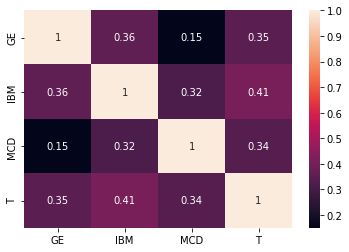

In [ ]:
#Correlacion de Pearson
matriz_correlacion=ret.corr().round(2)
sbn.heatmap(data=matriz_correlacion,annot=True,annot_kws={"size": 10});

**Correlacion de Pearson:** La correlacion de pearson va medir la relacion entre dos variables que para nuestro ejemplo seran los 4 activos que hemos venido analizando. Para realizar la debida interpretacion a esta sabemos que si es menor a 0 la relacion es negativa, mayor a 0 es que existe alguna relacion, mas cercano a 0 es que no hay relacion lineal, y si es igual 1 es una relacion lineal perfecta es decir con ella misma.

**GE:** General Electric es una compañia que se dedica a diversos sectores como construccion,transporte, salud, energia, aviacion, etc. Teniendo en cuenta esto su relacion con IBM es la mas alta que todas, pero apesar de eso se acerca a 0 por lo que existe una relacion pero muy minima, esto puede ser debido a que las dos compañias han trabajado con el tema de la tecnologia; de seguido no muy lejos de la relacion IBM, va T, pues AT&T es una compañia enfocada en las comunicacion digitales por lo que de alguna forma se relaciona con GE y su tecnologia, y finalmente muy lejos de esta se encuentra MCD que se evidencia una relacion casi nula, pues restaurantes y bienes raices (razon de MCD) no se relaciona tanto con la razon social de GE.

**IBM:** Ya conocemos la relacion de IBM con GE, asi que revisaremos la relacion entre IBM y T que es la mas fuerte entre dos activos distintos en nuestro cuadro de correlacion, pues hay que tener en cuenta que estas dos compañias trabajan con tecnologia y medios digitales. Por otro lado, la relacion con MCD podria verse mas en la tecnologia que usan, uno que la produce y otro que la usa en su cadena de restaurantes.

**T:** La relacion que tiene AT&T con MCD puede basarse en el internet que usan los restaurantes, pero de igual forma no es tan fuerte, por eso se ve reflejado con una correlacion de 0.34.

**MCD:** Ya hemos realizado todas las relaciones con las demas acciones.




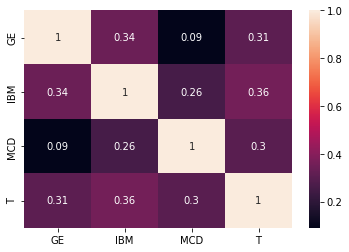

In [ ]:
#Correlacion de Spearman
matriz_correlacion=ret.corr(method="spearman").round(2)
sbn.heatmap(data=matriz_correlacion,annot=True,annot_kws={"size": 10});

**Correlacion de Spearman:** La correlacion de Spearman a diferencia de la anterior, relaciona el rango (diferencia entre valor maximo y minimo) de dos variables, por lo que se puede observar que los retornos de las acciones no tiene una relacion muy fuerte, pero si la existe, como se explicaba anteriormente con cada una de ellas.




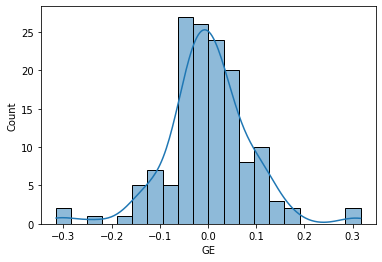

In [ ]:
#Histogramas frecuencia de retornos 
sbn.histplot(data=ret, x="GE", kde=True)

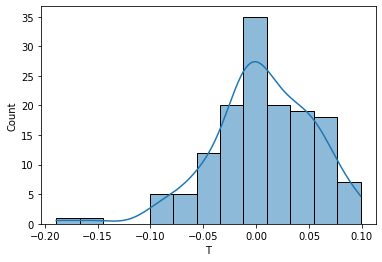

In [ ]:
sbn.histplot(data=ret, x="T", kde=True)

**Histogramas de frecuencia:** El histograma de frecuencia nos muestra cuantas veces una variable toma un valor, en este caso cuantas veces cada variable en este caso GE y T toma un retorno. En primer lugar nos encontramos que ninguno de los dos activos tienen una diatibucion normal fiel, pues son asimetricas y no cumplen con algunos supuestos importantes.



In [ ]:
# Prueba de Kolmogorov-Smirnov
mcd=stats.kstest(ret["MCD"],'norm')
ge=stats.kstest(ret["GE"],'norm')
ibm=stats.kstest(ret["IBM"],'norm')
t=stats.kstest(ret["T"],'norm')

In [ ]:
stats2={"MCD":mcd,"GE":ge,"IBM":ibm,"T":t}
df2=pd.DataFrame(stats2, index=["Estadistico","Valor P"])
df2

,MCD,GE,IBM,T
Estadistico,4.543297e-01,4.159825e-01,4.372657e-01,4.606994e-01
Valor P,1.736432e-27,6.374947e-23,2.144141e-25,2.713489e-28


**Prueba Kolmogrov-Smirnov:** La prueba de Kolmogorov-Smirnov es una prueba de normalidad que se le realizo a todos los activos,esta prueba en especifico más sensible a los valores cercanos a la mediana que a los extremos de la distribución. Su objetivo es señalar si los datos provienen de una población que tiene la distribución teórica especificada. En cuanto a los resultados si es menor que 0.05 la distribución no es normal, si es mayor que 0.05 la distribución es normal.Para este caso ninguno se los activos es normal

In [ ]:
#Volatilidad mensual y anualizada con Desviacion Estandar 
sigma_m = ret.std()
mean_m=ret.mean()
sigma_m

GE     0.086937
IBM    0.060536
MCD    0.042488
T      0.048299
dtype: float64

In [ ]:
sigma_a=sigma_m*np.sqrt(12)
sigma_a

GE     0.301157
IBM    0.209703
MCD    0.147183
T      0.167311
dtype: float64

In [ ]:
mean_m

GE     0.000231
IBM    0.003689
MCD    0.012605
T      0.006158
dtype: float64

In [ ]:
mean_a=mean_m*np.sqrt(12)
mean_a

GE     0.000802
IBM    0.012780
MCD    0.043666
T      0.021331
dtype: float64

**Desviacion estandar:** Sabemos que la volatilidad, viene siendo una desviacion de la accion en un determinado periodo de tiempo. Por lo tanto la desviacion estandar nos indica la dispersion que tienen las acciones o que tanto fluctua el precio de ella. Con los activos que estamos analizando tenemos la desviacion estandar de los retornos de ellos mismo, lo que nos indica que GE es el activo con mayor desviacion siendo de un 
30.11%, significando que su dispersion se da unos 30 puntos porcentuales desde la media. 

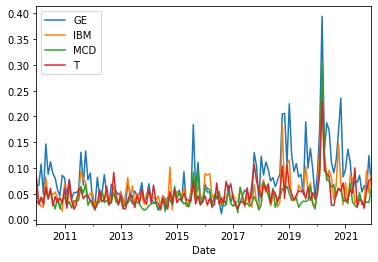

In [ ]:
#Volatidilad modelo de Parkinson 
lnHL = np.log(precios["High"]/precios["Low"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaPark_d.plot()


In [ ]:
#Volatidilad anual modelo de Parkinson 
sigmaPark=sigmaPark_d.mean()*np.sqrt(12)
sigmaPark

GE     0.267589
IBM    0.187842
MCD    0.147625
T      0.167825
dtype: float64

**Modelo Parkinson:** El modelo de volatilidad parkinson, solo tiene en cuenta los precios maximos y minimos de los activos en un determinado espacio de tiempo, que en este caso sera mensual y anual. El uso que podemos darle a esta, es que al saber cuanto son los maximos y minimos de la accion podemos conocer la volatilidad de la accion y hasta que extremos puede llegar, para que en el momento de invertir tengamos una idea de en donde podemos entrar y donde salir segun los precios historicos. Apartir de las 4 acciones que estamos observando, sabemos que que GE es el activo que tiene mas volatilidad 26,75%, en este caso son maximos y minimos mas diferenciados entre si. La unica critica que se le hace a este modelo, es que no tiene en cuenta los precios despues del precio de cierre es decir los precios overnight, por lo cual su precision no es exacta.

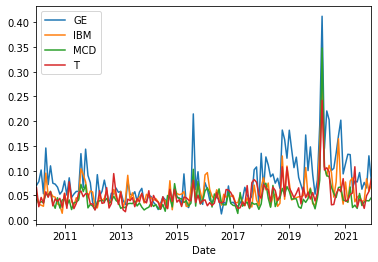

In [ ]:
#Volatilidad en Garman-Klass
lnHL = np.log(precios["High"]/precios["Low"]).dropna()
lnCO = np.log(precios["Close"]/precios["Open"]).dropna()
sigmaGK_d = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaGK_d.plot()

In [ ]:
#Volatilidad anual en Garman-Klass
sigmaGK=sigmaGK_d.mean()*np.sqrt(12)
sigmaGK

GE     0.274446
IBM    0.191380
MCD    0.152538
T      0.172823
dtype: float64

**Modelo Garman Klass:** A diferencia del modelo de Parkinson, el modelo de volatilidad de Graman Klass si tiene en cuenta los precios de apertura y cierre de la accion,por lo que podria considerarse mas eficiente. En este sentido, con el ejemplo de GE este viene siendo el mas volatil de los 4 activos, es decir el que tiene mayores fluctuaciones en el precio, pero al tener en cuenta los precios de apertura y cierre pasa de un 26,7% de volatilidad en parkinson, a un 27,4% de volatilidad en el modelo de Garman Klass, un 0.7 puntos porcentuales que en el momento de hacer un analisis de inversion puede ser muy importante.

In [ ]:
#Volatilidad EWMA
def EWMAvol(ret,Lambda):
  m = len(ret) 
  b = np.arange(m-1,-1,-1) # secuencia decreciente
  l = np.repeat(Lambda,m)

  varewma = ((np.power(ret,2)*(np.power(l,b))).sum())*(1-Lambda)
  EWMAvol = np.sqrt(varewma)
  return(EWMAvol)
Lambda = 0.94


In [ ]:
sigmaEWMAvol1=EWMAvol(ret["MCD"],0.94)*np.sqrt(12)

In [ ]:
sigmaEWMAvol2=EWMAvol(ret["GE"],0.94)*np.sqrt(12)

In [ ]:
sigmaEWMAvol3=EWMAvol(ret["IBM"],0.94)*np.sqrt(12)

In [ ]:
sigmaEWMA4=EWMAvol(ret["T"],0.94)*np.sqrt(12)

In [ ]:
results = [sigmaEWMAvol1, sigmaEWMAvol2, sigmaEWMAvol3, sigmaEWMA4]
ewmastats={"EWMA":results}
ewma=pd.DataFrame(ewmastats, index=["GE","IBM", "MCD", "T"])
ewma

,EWMA
GE,0.181807
IBM,0.365061
MCD,0.256371
T,0.188278


**Modelo EWMA:** La volatilidad ponderada exponencial, es indicar la volatilidad del siguiente periodo estudiado, es decir, si la estamos observando diariamente, es la volatilidad que se espera para mañana. Para este modelo los datos recientes tienen un impacto mas significativo que el resto de la serie historica, por lo que los resultados se pueden ver claramente afectados por la volatilidad reciente de la accion en cuestion.En el caso analizado podemos darnos cuentas que se estima que el que tenga mas volatilidad en el periodo esperado, es decir en el siguiente mes/año segun si la vemos anualizada o mensual, es la accion de IBM ya que su EWMA es de 36.5%, hay que tener en cuenta que esto puede ser tanto positivo como negativo.

In [ ]:
#Resultados de volatilidades anualizadas para todos los activos
stats3={"std":sigma, "Parkinson":sigmaPark, "Garman-Klass":sigmaGK}
df3=pd.DataFrame(stats3, index=["GE","IBM", "MCD", "T"])
Vol = pd.concat([df3, ewma], axis=1)
Vol

,std,Parkinson,Garman-Klass,EWMA
GE,0.048299,0.267589,0.274446,0.181807
IBM,0.048299,0.187842,0.191380,0.365061
MCD,0.048299,0.147625,0.152538,0.256371
T,0.048299,0.167825,0.172823,0.188278


[*********************100%***********************]  1 of 1 completed


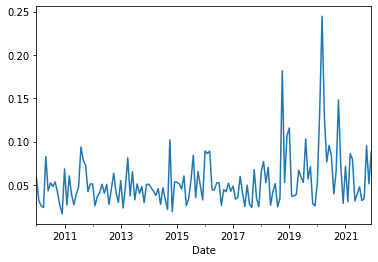

In [ ]:
#Grafica parkinson
IBM = ["IBM"]
precioIBM=yf.download(IBM,start="2010-01-01",end="2021-12-21",interval="1Mo").dropna()
precioIBM
lnHL = np.log(precioIBM["High"]/precioIBM ["Low"]).dropna()
sigmaP = ((1/(4*np.log(2)))*lnHL**2)**0.5
sigmaP.plot();

[*********************100%***********************]  1 of 1 completed


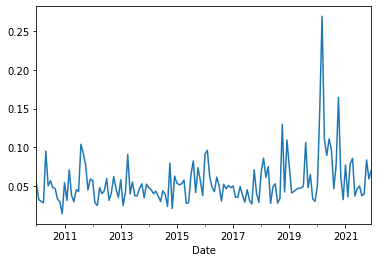

In [ ]:
#Grafica Garman-klass
IBM = ["IBM"]
precioIBM=yf.download(IBM,start="2010-01-01",end="2021-12-21",interval="1Mo").dropna()
precioIBM
lnHL = np.log(precioIBM["High"]/precioIBM ["Low"]).dropna()
lnCO = np.log(precioIBM["Close"]/precioIBM ["Open"]).dropna()
sigmaP = (0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)**0.5
sigmaP.plot();

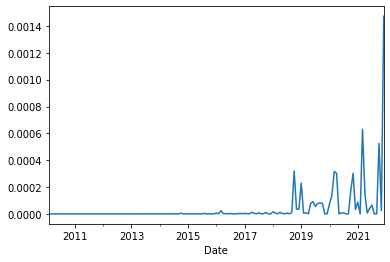

In [ ]:
#Grafica EWMA
Lambda = 0.94
m=len(ret)
b=np.arange(m-1,-1,-1)
l=np.repeat(Lambda,m)
varewma= ((np.power(retornos["IBM"],2)*(np.power(l,b))))*(1-Lambda)
varewma.plot()

**IBM:** Finalmente hemos escogido la accion de IBM, ya que durante el ejercicio nos hemos dado cuenta que a diferencia de las otras 4 esta no es tan volatil, ni rentable. Con el modelo de Parkinson y su grafica nos damos cuenta que su volatilidad varia entre un 5% y 15%, lo que podria llegar a concluir que sus precios maximos y minimos no fluctuan mucho, solo a diferencia del 2020 que por la coyuntura del mismo, hizo que todas las compañias tuvieran altos y bajos drasticos con una volatilidad mayor del 25%. En segundo lugar revisamos el modelo de Garman-Klass ya que este sera mas preciso al tener en cuenta los precios de cierre y apertura, el cual nos indica una volatilidad muy similar, pero la diferencia se encuentra en 2019 donde con Garman Klass sigue estando en un rango entre 5% y 15%, mientras que por parkinson alcanza casi el 20%, de igual forma es un claro ejemplo de como el modelo de Garman Klass, ajusta el modelo de Parkinson.Por ultimo, el modelo EWMA analizado anteriormente con el resto de acciones, indico que IBM seria el que tendria mayor voltalidad en el siguiente periodo de tiempo estimado, por lo que la grafica nos reafirma esto mostrando un gran crecimiento despues del ultimo periodo estudiado.